In this notebook, we'll make up some synthetic data, where each data point belongs to one of two classes. We'll use Fisher's linear discriminant to construct a classifier that assigns any new point $\vec{x}$ to one of the two classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'x2')

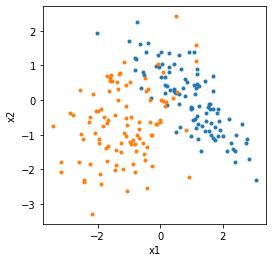

In [18]:
# Make up some two-dimensional data:
nA = 100
muA = np.array([1., 0])
sigA = np.array([[1,-0.8],[-0.8,1]])
xA = np.random.multivariate_normal(muA, sigA, nA)
nB = 100
muB = np.array([-1., -0.5])
sigB = np.array([[1,0.3],[0.3,1]])
xB = np.random.multivariate_normal(muB, sigB, nB)

# Concatenate the data:
X = np.vstack((xA, xB))  # X should be n_samples by n_variables, where n_samples=nA+nB
y = np.append(np.zeros(nA), np.ones(nB))  # y should have length n_samples

# Plot the data:
plt.figure(figsize=(4,4))
plt.plot(xA[:,0], xA[:,1], '.')
plt.plot(xB[:,0], xB[:,1], '.')
plt.xlabel('x1')
plt.ylabel('x2')

## Fisher's linear discriminant

In class we showed that the normal vector to the classifying hyperplane is given by
$$
\vec{w}_F \propto \mathbf{S}_W^{-1} (\vec{m}_2 - \vec{m}_1),
$$
where the "within-class" covariance is given by
$$
\mathbf{S}_W = \frac{1}{N_1}\sum_{n \in \mathcal{C}_1} (\vec{x}_n - \vec{m}_1) (\vec{x}_n - \vec{m}_1)^\top
+ \frac{1}{N_2} \sum_{n \in \mathcal{C}_2} (\vec{x}_n - \vec{m}_2) (\vec{x}_n - \vec{m}_2)^\top,
$$
and $\vec{m}_1$ and $\vec{m}_2$ are the means of the data points from class 1 and class 2, respectively.

The distance from the origin to the closest point on the hyperplane is given by 
$$
y_0 = \frac{-b + \sqrt{b^2 - 4ac}}{2a},
$$
where 
$$
\begin{align}
a &= \frac{1}{s_1^2} - \frac{1}{s_2^2} \\
b &= -2\left( \frac{m_1}{s_1^2} - \frac{m_2}{s_2^2} \right) \\
c &= \left( \frac{m_1}{s_1} \right)^2 - \left( \frac{m_2}{s_2} \right)^2 + 2 \ln \left(\frac{s_1}{s_2} \right).
\end{align}
$$

**Exercise**

Using the above expressions, calculate and plot the Fisher linear discriminant along with the synthetic data generated above. Everything should be done from scratch using only basic Numpy functions.


Text(0, 0.5, 'x2')

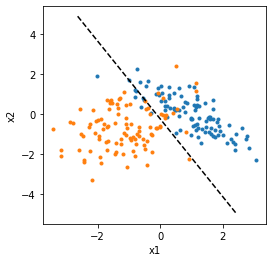

In [19]:
## Solution ##

# Create a 2D vector wF defining the direction of the Fisher linear discriminant:
m1 = np.mean(xA, axis=0)
m2 = np.mean(xB, axis=0)
sw = np.cov(xA.T) + np.cov(xB.T)
wF = np.linalg.inv(sw) @ (m2 - m1)

# Define the projected means mm1 and mm2 and covariances the location of the discriminant along this vector:
mm1 = m1 @ wF
mm2 = m2 @ wF
s1 = (wF @ np.cov(xA.T) @ wF)**0.5
s2 = (wF @ np.cov(xB.T) @ wF)**0.5
a = 1/s1**2 - 1/s2**2
b = -2*(mm1/s1**2 - mm2/s2**2)
c = (mm1/s1)**2 - (mm2/s2)**2 + 2*np.log(s1/s2)
y0 = (-b + (b**2 - 4*a*c)**0.5)/(2*a)

# The point on the discriminant closest to the origin:
wF0 = y0*wF/np.linalg.norm(wF)

# A vector orthogonal to wF:
wF_perp = np.array([[0,1],[-1,0]]) @ wF

# Two points along the discriminant:
wF1 = wF0 + 4*wF_perp
wF2 = wF0 - 4*wF_perp

# Plot the data with the discriminant:
plt.figure(figsize=(4,4))
plt.plot(xA[:,0], xA[:,1], '.')
plt.plot(xB[:,0], xB[:,1], '.')
plt.plot([wF1[0], wF2[0]], [wF1[1], wF2[1]], '--k')
plt.xlabel('x1')
plt.ylabel('x2')

**Exercise**: 

Plot a histogram showing the data projected along the direction perpendicular to the discriminant, together with the location of the discriminant itself. 


Text(0, 0.5, 'Count')

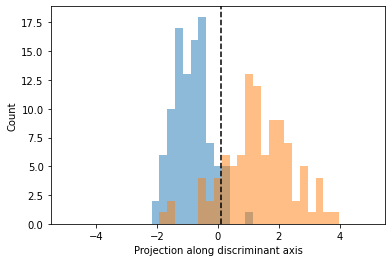

In [20]:
## Solution ##

# Plot a histogram of the data projected along wF:
plt.hist(xA @ wF/np.linalg.norm(wF), alpha=0.5, bins=np.linspace(-5,5,40))
plt.hist(xB @ wF/np.linalg.norm(wF), alpha=0.5, bins=np.linspace(-5,5,40))
plt.axvline(y0, c='k', ls='--')
plt.xlabel('Projection along discriminant axis')
plt.ylabel('Count')

**Exercise**: 

Try modifying the synthetic data so that ~90% of the data belongs to one class (showing plots of this is optional) and comment on whether and why the classifier succeeds or fails for this type of unbalanced dataset.

**Solution**: If the data is modified so that most data points belong to class A, then the discriminant remains in the same location as for the balanced dataset, with the result that a large number of the points belonging to class A are misclassified as belonging to class B. This happens because no prior information is included in this model about how likely a point is to belong to a particular class.